# **SMS Spam Classification with NLP**
---
SMS spam classification with Natural Language Processing (NLP) entails creating a model that can automatically determine if a text message (SMS) is spam or not. NLP is an area of artificial intelligence that studies the interplay of computers and human language. The purpose of SMS spam categorization is to examine text messages' content and decide whether they are spam or authentic.

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam. The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

More info: [SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [1]:
!pip install --upgrade nltk
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/3f/61/047b353f0ad550226ef962da182b4a09b689eb6df6bd84a03e44f9ee95bb/scikit_learn-1.4.0-1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 49.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [3]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk

from matplotlib.colors import ListedColormap

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline    
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier

In [4]:
nltk.download('punkt')  # Downloads the 'punkt' resource which is often needed
nltk.download('wordnet')  # Downloads the 'wordnet' resource
nltk.download('averaged_perceptron_tagger')  # Downloads the 'averaged_perceptron_tagger' resource
# nltk.download('all')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
#Loading data
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='latin1')

# **Exploratory Data Analysis**
---
The section of Exploratory Data Analysis (EDA) is an approach to analyzing and visualizing dataset to get insights of their main characterisitics. This can be achieved with the help of statistical graphics and other visualization methods. The target of EDA is to gain insights into the data, understand its structure, and identify patterns, relationships, and anomalies.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
# Dropping the unused collumns 
drop_col_list = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"]
df = df.drop(df[drop_col_list], axis=1)

# Renaming the columns for better readability
df.rename(columns = {"v1":"Target", "v2":"Text"}, inplace = True)
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# Group by 'Target' and count the occurrences
target_counts = df.groupby('Target').size().reset_index(name='Count')
print(target_counts)

  Target  Count
0    ham   4825
1   spam    747


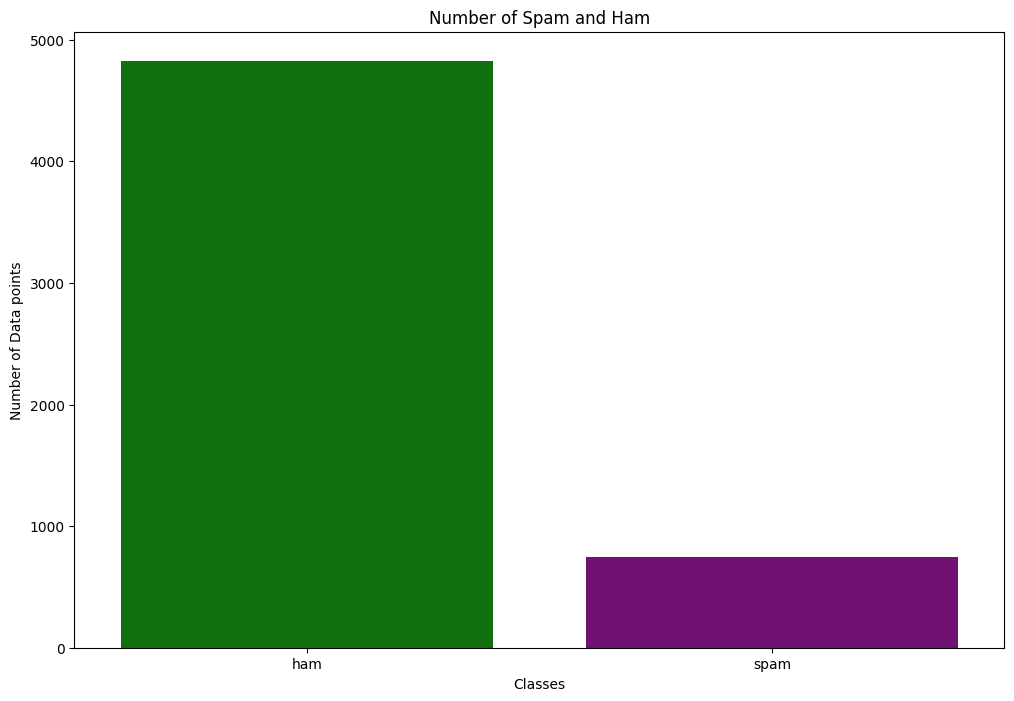

In [10]:
# Plotting the target and check if the data is imbalanced or not
plt.figure(figsize=(12,8))
fig = sns.countplot(x= df["Target"], palette=['green','purple'])
fig.set_title("Number of Spam and Ham")
fig.set_xlabel("Classes")
fig.set_ylabel("Number of Data points")
plt.show(fig)

# **Feature Engineering**
---
Feature engineering in NLP entails converting raw text data into a format appropriate for training a machine learning model. It seeks to generate meaningful and relevant features that capture the most important information in the text, allowing the model to learn patterns and make accurate predictions. Feature engineering is important since raw text input is often unstructured and multidimensional, and extracting useful information can have a major impact on NLP model performance.

In [11]:
# Adding more columns to show the number of characters, words, and sentences with NLTK library 
df["No_of_Characters"] = df["Text"].apply(len)
df["No_of_Words"] = df.apply(lambda row: nltk.word_tokenize(row["Text"]), axis=1).apply(len)
df["No_of_Sentences"] = df.apply(lambda row: nltk.sent_tokenize(row["Text"]), axis=1).apply(len)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_Sentences,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


In [12]:
df

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


<Figure size 1200x800 with 0 Axes>

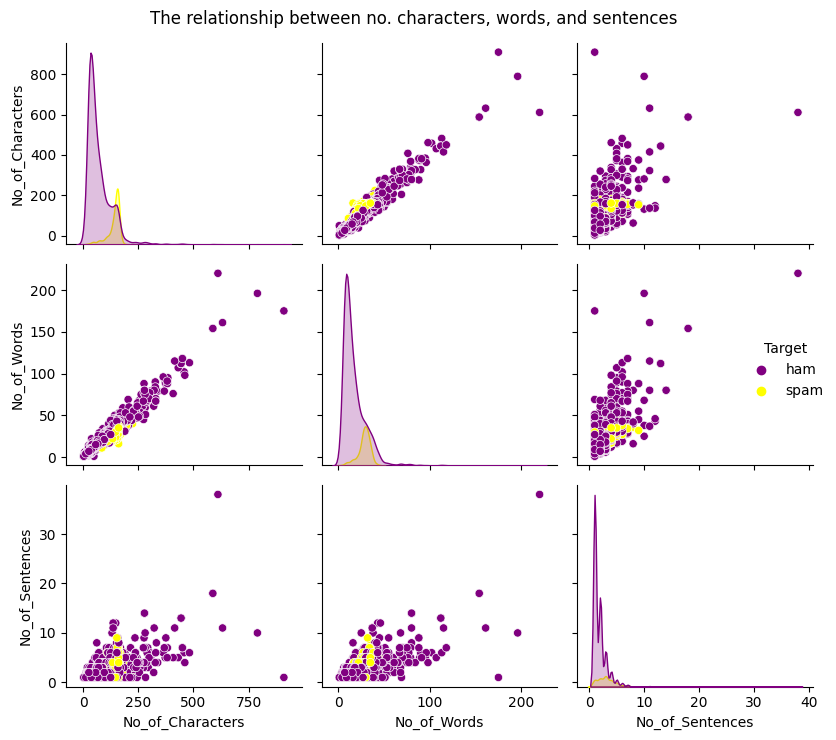

In [13]:
plt.figure(figsize=(12,8))
fig = sns.pairplot(data=df, hue="Target",palette=['purple','yellow'])
plt.suptitle("The relationship between no. characters, words, and sentences")
plt.tight_layout()
plt.show(fig)

# **Outlier Detection**
---
Outlier detection in machine learning is the process of detecting data points that differ significantly from the rest of the data. These data points are typically referred to as "outliers" or "anomalies." Outliers can be errors in the data, rare events, or examples that do not follow the typical patterns found in the rest of the dataset. Outlier detection is critical in many machine learning and data analysis jobs because outliers can distort statistical studies and have a negative impact on model performance.


In [14]:
# Dropping the outliers. 
df = df[(df["No_of_Characters"] < 500)]
df.shape

(5566, 5)

<Figure size 1200x800 with 0 Axes>

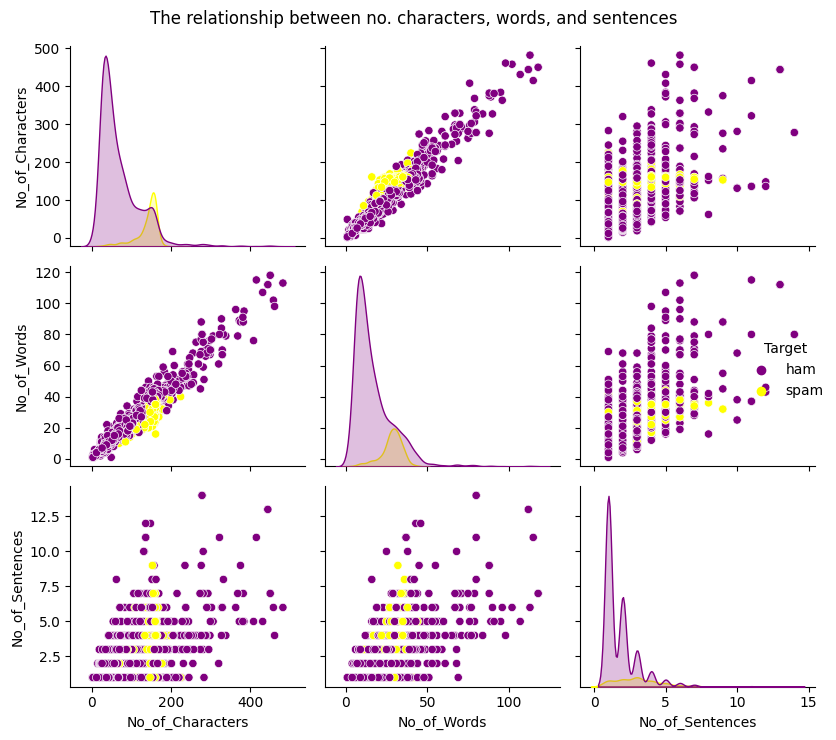

In [15]:
plt.figure(figsize=(12,8))
fig = sns.pairplot(data=df, hue="Target",palette=['purple','yellow'])
plt.suptitle("The relationship between no. characters, words, and sentences")
plt.tight_layout()
plt.show(fig)

# **Data Preprocessing**
---
Data Preprocessing is an important step that involves cleaning and transforming raw text data into a format suitable for analysis, training, and assessing NLP models. It also addresses the specific issues posed by unstructured text data.

In this notebok, these following steps will be taken:
* **Data Cleaning**
* **Tokenization**
* **Stopword Removal**
* **Lemmatization & Stemming**
* **Text Vectorization**

## **Data Cleaning**
---
Data cleaning in NLP refers to the act of preparing and improving textual data for machine learning tasks. This includes resolving missing information, deleting extraneous letters or symbols, translating text to a uniform format (e.g., lowercase), and fixing errors and inconsistencies. The purpose of NLP data cleaning is to produce a consistent and representative dataset that will improve the performance of subsequent natural language processing activities such as sentiment analysis, text classification, and language modeling.

In [16]:
df.head()

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
def clean_text(text):
    clean = re.sub('[^a-zA-Z]', ' ', text) # Replacing all non-alphabetic characters with a space
    clean = clean.lower() # converting to lowecase
    clean = clean.split() # splits the cleaned text sms into a list of words
    clean = ' '.join(clean) # joins the list of words back into a string, using a single space as the separator between the words
    return clean

df.copy()
df.loc[:, "Clean_Text"] = df["Text"].apply(clean_text)

/tmp/ipykernel_18/705803435.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Clean_Text"] = df["Text"].apply(clean_text)


In [18]:
df

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences,Clean_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,this is the nd time we have tried contact u u ...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,will b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,pity was in mood for that so any other suggest...
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,the guy did some bitching but i acted like i d...


## **Tokenization**
---

Tokenization is a fundamental step in natural language processing (NLP) that involves breaking down a text into smaller units, typically words or subwords, referred to as tokens. The process of tokenization is crucial for various NLP tasks because it transforms continuous text into a structured format that can be easily analyzed, processed, and understood by algorithms.

**Word Tokenization:** Word tokenization involves splitting a text into individual words. For example, the sentence "SMS Spam Classification with NLP" would be tokenized into the list of words: ["SMS", "Spam", "Classification", "with", "NLP"].

**Sentence Tokenization:** Sentence tokenization involves breaking a text into individual sentences. For example, the paragraph "NLP is fascinating. It involves language understanding and processing." would be tokenized into the list of sentences: ["NLP is fascinating.", "It involves language understanding and processing."].

In [19]:
# The nltk.word_tokenize function from the Natural Language Toolkit (NLTK) is used
# to tokenize the text in the "Clean_Text" column of that row
df.loc[:, "Tokenized_Text"] = df.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)

/tmp/ipykernel_18/3340129749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Tokenized_Text"] = df.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)


In [20]:
df.head()

,Target,Text,No_of_Characters,No_of_Words,No_of_Sentences,Clean_Text,Tokenized_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry in a wkly comp to win fa cup final ...,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah i don t think he goes to usf he lives arou...,"[nah, i, don, t, think, he, goes, to, usf, he,..."


## **Stopword Removal**
---

In natural language processing (NLP), stopwords refer to the most common words in a language that are often considered to be of little value in terms of information content. These words are typically filtered out during the preprocessing of text data before analysis. The rationale behind removing stopwords is that they occur frequently in language but do not contribute much to the meaning or context of a document.

Examples of common English stopwords include:

* **Articles:** "a," "an," "the"
* **Conjunctions:** "and," "but," "or"
* **Prepositions:** "in," "on," "with"
* **Pronouns:** "he," "she," "it"
* **Auxiliary verbs:** "is," "do," "be"

In [21]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df.loc[:, "No_Stopword_Text"] = df["Tokenized_Text"].apply(remove_stopwords)

/tmp/ipykernel_18/1086882397.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "No_Stopword_Text"] = df["Tokenized_Text"].apply(remove_stopwords)


In [22]:
df[['Tokenized_Text','No_Stopword_Text']].head()

,Tokenized_Text,No_Stopword_Text
0,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, in, a, wkly, comp, to, win, fa, ...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, i, don, t, think, he, goes, to, usf, he,...","[nah, think, goes, usf, lives, around, though]"


## **Lemmatization & Stemming**
---
Lemmatization involves reducing words to their base or dictionary form, known as the lemma, ensuring that the resulting lemma is a valid word in the language. In contrast to stemming, lemmatization not only converts a word to its root form but also guarantees that the root word is linguistically valid in the given language, in this case, English. When utilizing lemmatization, the output remains in English.

Stemming is the process of removing suffixes from words to derive their root or base form, known as the stem. While the resulting stem may not necessarily be a valid word, it often captures the core meaning of the original word. The stem is created by eliminating the prefix or suffix of a word, linking back to the etymology of the word. As languages evolve, stemming helps trace words back to their root forms, acknowledging the historical development of languages. For example, English, as a derivative of Latin, highlights how stemming can bring a word back to its linguistic origin.

Key Differences:

* **Output:** Stemming may result in a stem that is not a valid word and lemmatization results in a valid word (lemma).
* **Precision:** Stemming is a more aggressive approach, often resulting in a shorter stem and lemmatization is a more conservative approach, preserving the grammatical and semantic meaning.
* **Language Dependency:** Stemming is language-dependent and may vary for different languages and lemmatization often requires language-specific information and is more language-dependent.
* **Use Cases:** Stemming is faster and is commonly used in information retrieval and search engines and lemmatization is preferred in tasks where preserving the semantic meaning of words is crucial, such as in question answering or machine translation.

In a typical preprocessing pipeline, lemmatization is generally performed before stemming. The reason for this order is rooted in the goals and characteristics of these two text normalization techniques.

In [23]:
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text):
    lemmas = [lemmatizer.lemmatize(word) for word in text]
    return lemmas

In [24]:
df.loc[:, "Lemmatized_Text"] = df["No_Stopword_Text"].apply(lemmatize_word)
df[['No_Stopword_Text', 'Lemmatized_Text']]

/tmp/ipykernel_18/3617129131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Lemmatized_Text"] = df["No_Stopword_Text"].apply(lemmatize_word)


,No_Stopword_Text,Lemmatized_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, early, hor, u, c, already, say]"
4,"[nah, think, goes, usf, lives, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tried, contact, u, u, pound, prize,..."
5568,"[b, going, esplanade, fr, home]","[b, going, esplanade, fr, home]"
5569,"[pity, mood, suggestions]","[pity, mood, suggestion]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitching, acted, like, interested, buyin..."


In [25]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = [stemmer.stem(word) for word in text]
    return text

In [26]:
df.loc[:, 'Stemmed_Text'] = df['No_Stopword_Text'].apply(stemm_text).copy()
df[['No_Stopword_Text', 'Stemmed_Text']]

/tmp/ipykernel_18/59479721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Stemmed_Text'] = df['No_Stopword_Text'].apply(stemm_text).copy()


,No_Stopword_Text,Stemmed_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, think, goes, usf, lives, around, though]","[nah, think, goe, usf, live, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tri, contact, u, u, pound, prize, c..."
5568,"[b, going, esplanade, fr, home]","[b, go, esplanad, fr, home]"
5569,"[pity, mood, suggestions]","[piti, mood, suggest]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,..."


In [27]:
df.loc[:, 'LS_Text'] = df['Lemmatized_Text'].apply(stemm_text).copy()
df[['Lemmatized_Text', 'LS_Text']]

/tmp/ipykernel_18/1814023691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'LS_Text'] = df['Lemmatized_Text'].apply(stemm_text).copy()


,Lemmatized_Text,LS_Text
0,"[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazi, avail, bugi, n, gre..."
1,"[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,"[free, entry, wkly, comp, win, fa, cup, final,...","[free, entri, wkli, comp, win, fa, cup, final,..."
3,"[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,"[nah, think, go, usf, life, around, though]","[nah, think, go, usf, life, around, though]"
...,...,...
5567,"[nd, time, tried, contact, u, u, pound, prize,...","[nd, time, tri, contact, u, u, pound, prize, c..."
5568,"[b, going, esplanade, fr, home]","[b, go, esplanad, fr, home]"
5569,"[pity, mood, suggestion]","[piti, mood, suggest]"
5570,"[guy, bitching, acted, like, interested, buyin...","[guy, bitch, act, like, interest, buy, someth,..."


# **Text Vectorization**
---
Term Frequency – Inverse Document Frequency (TF-IDF) in NLP is a numerical statistic that measures the value of a word in a document in comparison to a collection of documents. It is commonly used in Natural Language Processing (NLP) and information retrieval. TF-IDF weights terms based on their frequency in a specific document (Term Frequency) and rarity over the entire dataset (Inverse Document Frequency).

The formula for TF-IDF for a term (word) "t" in a document "d" within a collection of documents is given by:

$$\text{TF-IDF}(d,t) = \text{TF}(d,t) \times \text{IDF}(t)$$

* $ \text{TF}(t,d) $ represents the Term Frequency, which measures how often the term "t" occurs in the document "d." It is usually normalized to prevent bias towards longer documents.
* $ \text{IDF}(t) $ is the Inverse Document Frequency, which measures the rarity of the term "t" across all documents in the dataset. It is calculated as $\log\left(\frac{N}{DF(t)}\right)$, where $ \text{N} $ is the total number of documents and $ \text{DF}(t) $ is the number of documents containing the term "t."

The TF-IDF score is higher for words that are prevalent within an individual document but infrequent across the entire collection of documents. This helps highlight terms that are distinct to a specific document and can be employed in tasks like text classification, retrieving information, and analyzing document similarity. In practical applications, TF-IDF is frequently utilized to convert a group of textual documents into numerical vectors. Each document is then represented by a vector of TF-IDF weights assigned to each term in the vocabulary.

In [28]:
# Creating a corpus of text feature to encode further into vectorized form
corpus= []
for i in df["LS_Text"]:
    msg = ' '.join([row for row in i]) # Joins the strings within the list into a single space-separated string
    corpus.append(msg) # Appends the processed string (msg) to the corpus list
    
corpus[:5]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think go usf life around though']

In [29]:
tfidf = TfidfVectorizer() 
X = tfidf.fit_transform(corpus).toarray()

# **Model Building**
---
The model building process in NLP entails developing and training a machine learning model to execute a specified task on textual data. This is a critical phase in the NLP pipeline, and it is determined by the nature of the problem. The following steps will be performed in the Model Building phase:
* Setting up features and target as X and y
* Splitting the testing and training sets
* Build a pipeline of model for different classifiers
* Fit all the models on training data
* Get the cross-validation on the training set for all the models and check the accuracy

In [30]:
label_encoder = LabelEncoder()
df.loc[:, "Target"] = label_encoder.fit_transform(df["Target"])

In [31]:
# Splitting the dataset into testing and training sets
y = df["Target"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Creating a list of models
classifiers = [CatBoostClassifier(verbose=False),
               LogisticRegression(random_state=42),
               RandomForestClassifier(),
               SVC(),
               MultinomialNB(), 
               KNeighborsClassifier(), 
               ]

for cls in classifiers:
    cls.fit(X_train, y_train)

In [33]:
# Cross Validation Score
for i, model in enumerate(classifiers):
    cv_score = cross_val_score(model, X_train,y_train,scoring="accuracy", cv=10)
    print(model, ":", cv_score.mean())

<catboost.core.CatBoostClassifier object at 0x782547ef9990> : 0.9764165868897061
LogisticRegression(random_state=42) : 0.9602403385902152
RandomForestClassifier() : 0.9777613745150401
SVC() : 0.975964125560538
MultinomialNB() : 0.9651836549604476
KNeighborsClassifier() : 0.9132952083438303


# **Model Evaluation**
---

In [34]:
precision =[]
recall =[]
f1_score = []
train_set_acc = []
test_set_acc = []

for i in classifiers:
    pred_train = i.predict(X_train)
    pred_test = i.predict(X_test)
    prec = metrics.precision_score(y_test, pred_test)
    recal = metrics.recall_score(y_test, pred_test)
    f1_s = metrics.f1_score(y_test, pred_test)
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
  
    precision.append(prec)
    recall.append(recal)
    f1_score.append(f1_s)
    train_set_acc.append(train_acc)
    test_set_acc.append(test_acc)

In [35]:
eval_data = {'Precision':precision,
             'Recall':recall,
             'F1score':f1_score,
             'Accuracy on Testset':test_set_acc,
             'Accuracy on Trainset':train_set_acc}

# Create pandas DataFrame with classifier names as indices.
classifier_model = [cls.__class__.__name__ for cls in classifiers]
result_df = pd.DataFrame(eval_data, index=classifier_model)

In [36]:
cmap = ListedColormap(["purple","violet"])
result_df.style.background_gradient(cmap=cmap)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
CatBoostClassifier,0.970803,0.820988,0.889632,0.909336,0.931716
LogisticRegression,0.991304,0.703704,0.823105,0.909336,0.931716
RandomForestClassifier,1.000000,0.808642,0.894198,0.909336,0.931716
SVC,0.992593,0.827160,0.902357,0.909336,0.931716
MultinomialNB,1.000000,0.753086,0.859155,0.909336,0.931716
KNeighborsClassifier,1.000000,0.376543,0.547085,0.909336,0.931716


In [37]:
# Create new columns for each criterion
result_df['Precision Rank'] = result_df['Precision'].rank(ascending=False)
result_df['Recall Rank'] = result_df['Recall'].rank(ascending=False)
result_df['F1score Rank'] = result_df['F1score'].rank(ascending=False)

# Calculate the mean of the ranks to create an overall rank
result_df['Overall Rank'] = result_df[['Precision Rank', 'Recall Rank', 'F1score Rank']].mean(axis=1)

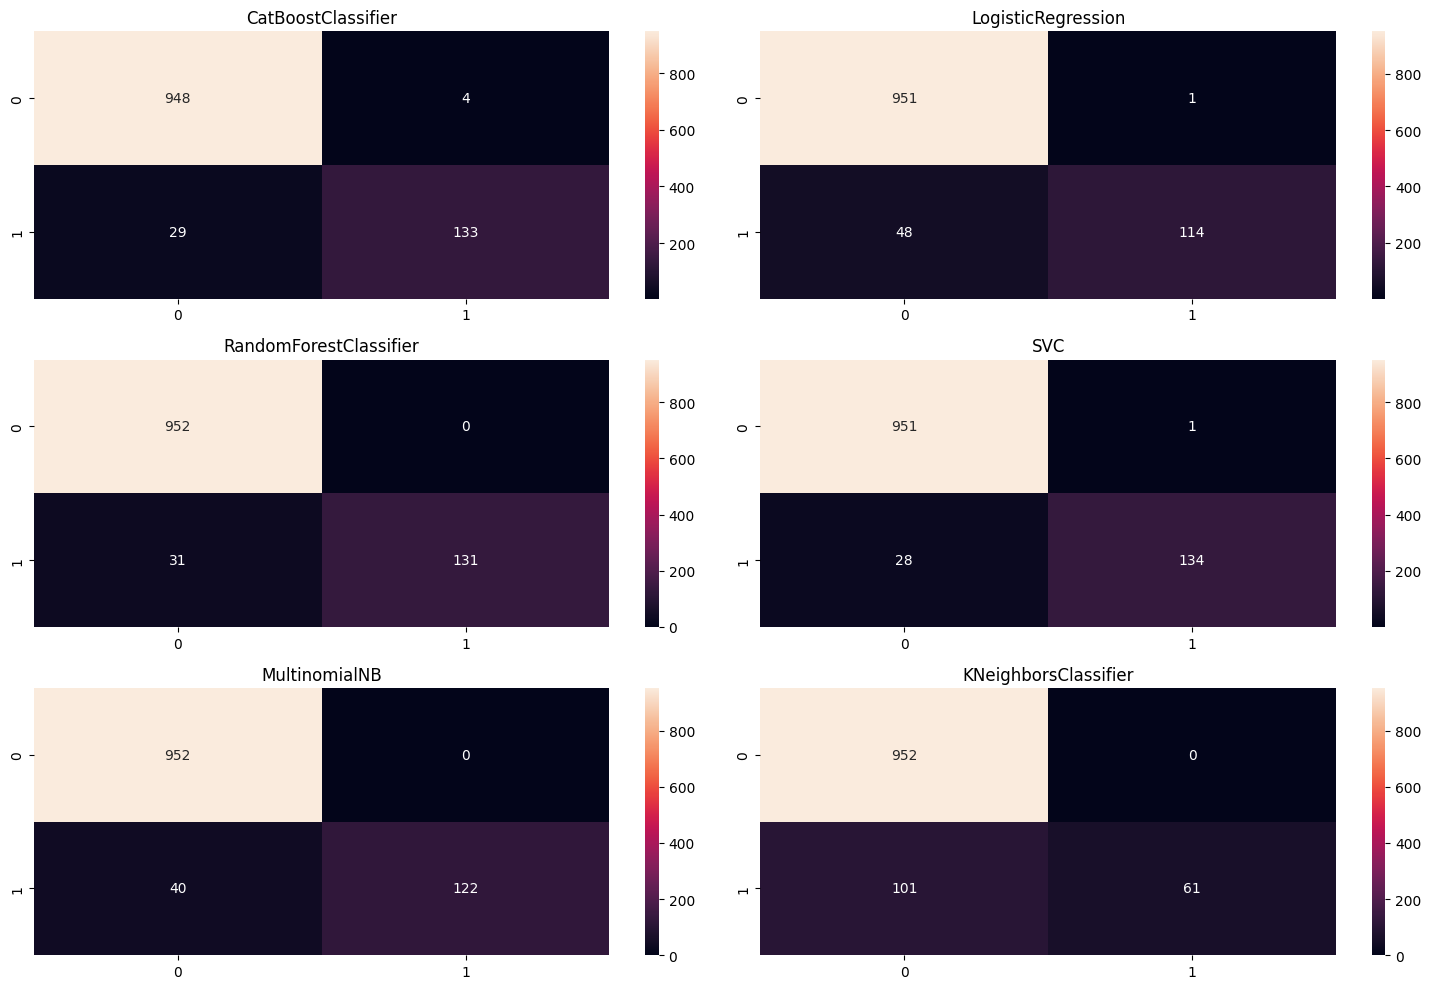

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

for cls, ax in zip(classifiers, axes.flatten()):
    y_pred = cls.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", ax=ax)
    ax.set_title(type(cls).__name__)

plt.tight_layout()
plt.show()

In [39]:
predictions_results = []

for i, model in enumerate(classifiers):
    correct_train = (pred_train == y_train).tolist()
    correct_test = (pred_test == y_test).tolist()
    
    predictions_results.append({
        'Model': model.__class__.__name__,
        'Train Predictions': pred_train,
        'Train Correct': correct_train,
        'Test Predictions': pred_test,
        'Test Correct': correct_test
    })

predictions_df = pd.DataFrame(predictions_results)

In [40]:
predictions_df

,Model,Train Predictions,Train Correct,Test Predictions,Test Correct
0,CatBoostClassifier,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."
1,LogisticRegression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."
2,RandomForestClassifier,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."
3,SVC,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."
4,MultinomialNB,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."
5,KNeighborsClassifier,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[False, True, True, True, True, True, True, Tr...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[True, True, False, True, True, True, True, Tr..."


In [41]:
# Filter the DataFrame for best model
best_results = predictions_df[predictions_df['Model'] == 'SVC'].iloc[0]

best_df = pd.DataFrame({
    'Actual Test': y_test.tolist(),
    'Test Predictions': best_results['Test Predictions'],
    'Test Result': best_results['Test Correct']
})

print(best_df)

      Actual Test  Test Predictions  Test Result
0               0                 0         True
1               0                 0         True
2               1                 0        False
3               0                 0         True
4               0                 0         True
...           ...               ...          ...
1109            0                 0         True
1110            0                 0         True
1111            0                 0         True
1112            0                 0         True
1113            0                 0         True

[1114 rows x 3 columns]


In [42]:
incorrect_predictions_df = best_df[best_df['Test Result'] == False]
incorrect_predictions_df

,Actual Test,Test Predictions,Test Result
2,1,0,False
16,1,0,False
19,1,0,False
46,1,0,False
62,1,0,False
...,...,...,...
1054,1,0,False
1068,1,0,False
1072,1,0,False
1087,1,0,False


# **References**
---
* https://www.kaggle.com/code/karnikakapoor/spam-or-ham-sms-classifier
* https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained
* https://www.kaggle.com/code/faressayah/natural-language-processing-nlp-for-beginners